In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import glob 
import astropy as ap 
from astropy.io import fits
import doppler

In [20]:
files = glob.glob('*.fits')

In [21]:
def get_info(filename):
    x = fits.open(filename)
    res = x[0].header['RES']
    nchan = x[0].header['NCHAN']
    l = x[0].header['L']
    b = x[0].header['B']
    jd = x[0].header['JD']
    ra = x[0].header['RA']
    dec = x[0].header['DEC']
    spec = x[0].header['NSPEC']
    polar_1st = np.array([x[i+1].data['auto0_real'] for i in range(int(x[0].header['NSPEC']))])
    polar_2nd = np.array([x[i+1].data['auto1_real'] for i in range(int(x[0].header['NSPEC']))])

    avg1 = np.mean(polar_1st, axis = 0)
    avg2 = np.mean(polar_2nd, axis = 0)
    
    x.close()
    
    return res, nchan, l, b, jd, ra, dec, avg1, avg2

In [22]:
RES = []
NCHAN = []
L = []
B = []
POLAR1 = []
POLAR2 = []
JD = []
RA = []
DEC = []

for i in range(int(len(files))):
    r , ch, l , b, jd, ra, dec, av1, av2  = get_info(files[i])
    RES.append(r)
    NCHAN.append(ch)
    L.append(l)
    B.append(b)
    POLAR1.append(av1)
    POLAR2.append(av2)
    JD.append(jd)
    RA.append(ra)
    DEC.append(dec)
    

In [23]:
v_corrected = []
for i in range(int(len(JD))):
    v = doppler.get_projected_velocity(RA[i],DEC[i],JD[i],obs_lat=37.9183, obs_lon=-122.1067, 
        obs_alt=304, epoch=2451545.)
    v_corrected.append(float(v/1000))

In [33]:
LOs1 = np.genfromtxt('RADEC_info419',skip_header=1,usecols=1,dtype='str',comments='()')
LO1 = [int(LOs1[i][1:4]) for i in range(int(len(LOs1)))]
LOs2 = np.genfromtxt('RADEC_info419_1',skip_header=1,usecols=1,dtype='str',comments='()')
LO2 = [int(LOs2[i][1:4]) for i in range(int(len(LOs2)))]
LOs3 = np.genfromtxt('RADEC_info419_2',skip_header=1,usecols=1,dtype='str',comments='()')
LO3 = [int(LOs3[i][1:4]) for i in range(int(len(LOs3)))]
LOs4 = np.genfromtxt('RADEC_info419_3',skip_header=1,usecols=1,dtype='str',comments='()')
LO4 = [int(LOs4[i][1:4]) for i in range(int(len(LOs4)))]
LOs5 = np.genfromtxt('RADEC_info419_4',skip_header=1,usecols=1,dtype='str',comments='()')
LO5 = [int(LOs5[i][1:4]) for i in range(int(len(LOs5)))]

LO = np.concatenate([LO1,LO2,LO3,LO4,LO5])

In [35]:
len(LO)

1106

In [25]:
from astropy import units as u
FREQS = []
for i in range(int(len(RES))):
    freqs = (np.arange(NCHAN[i]) * RES[i]*u.Hz + 2 * LO[i] * u.MHz + 144 * u.MHz).to(u.MHz).value
    FREQS.append(freqs)

In [26]:
c = 3e8
f0 = 1420
dopp_vel = []
for i in range(int(len(FREQS))):
    v = ((c*(FREQS[i]-f0))/f0)/1000 
    dopp_vel.append(v)

In [27]:
Vel = []
for i in range(int(len(dopp_vel))):
    v = dopp_vel[i] + v_corrected[i]
    Vel.append(v)

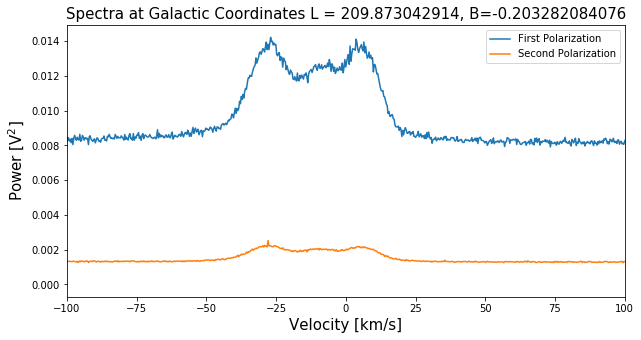

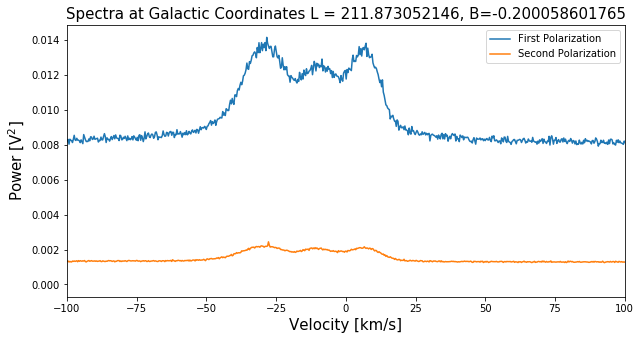

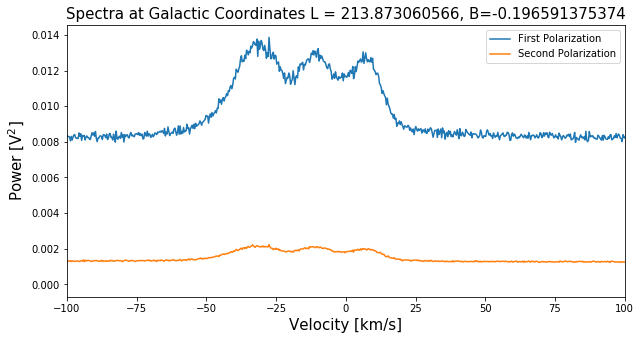

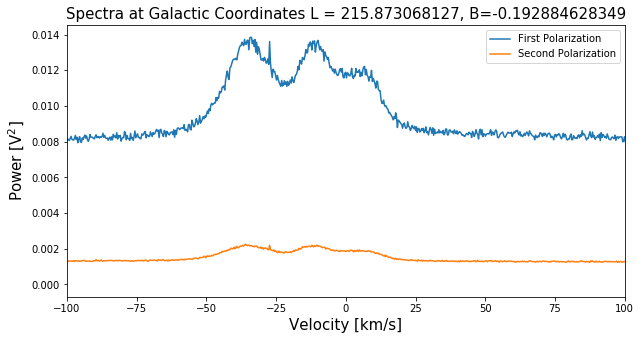

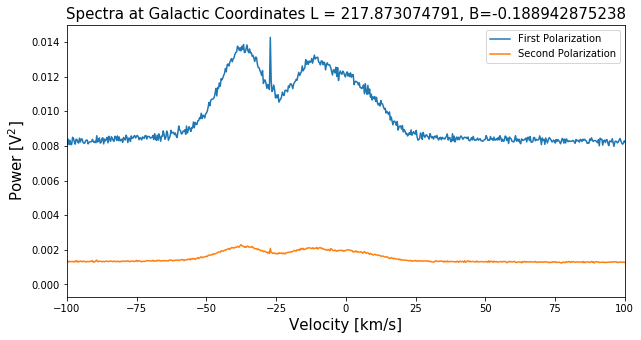

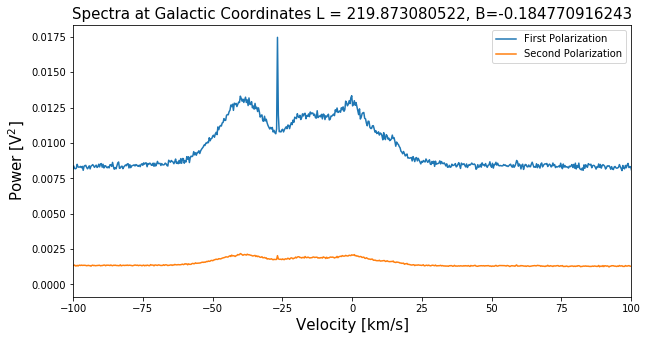

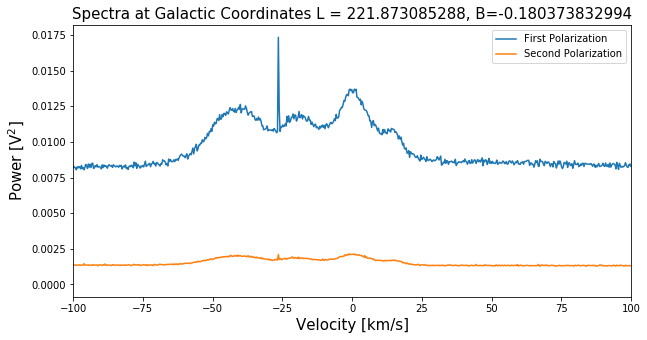

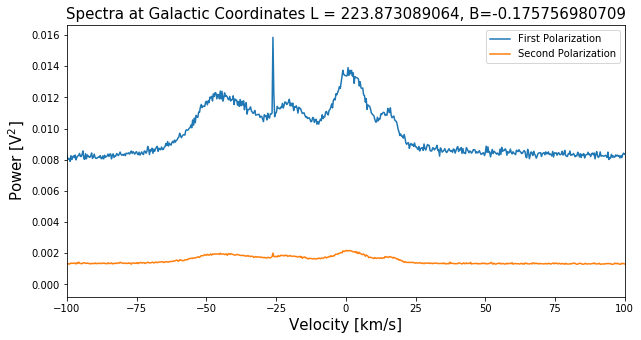

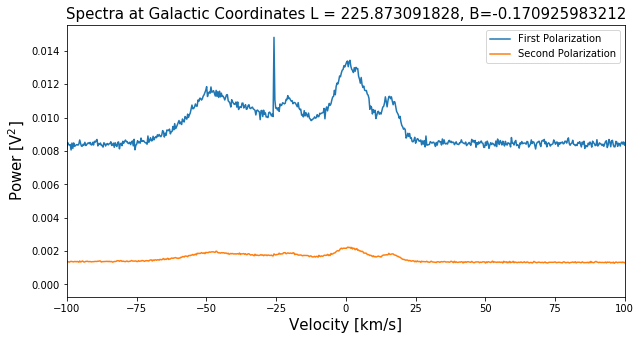

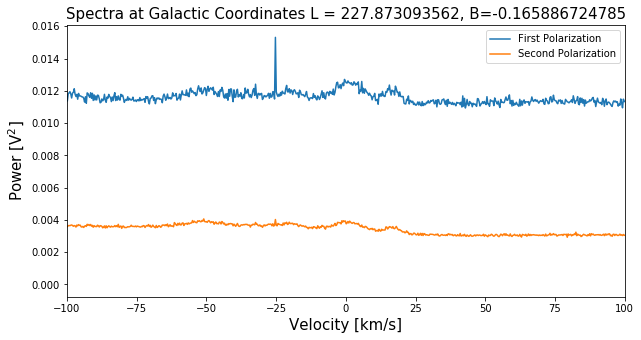

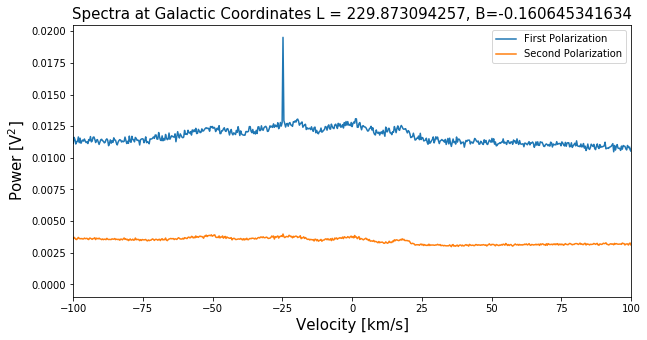

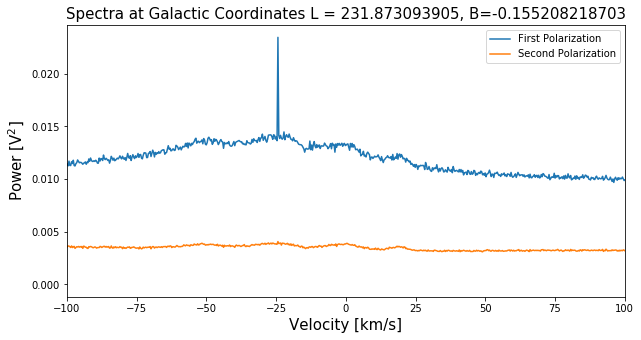

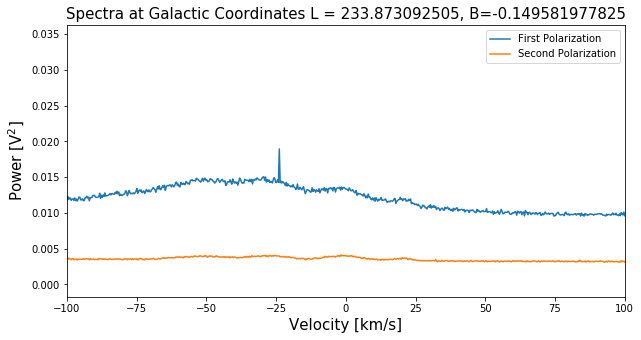

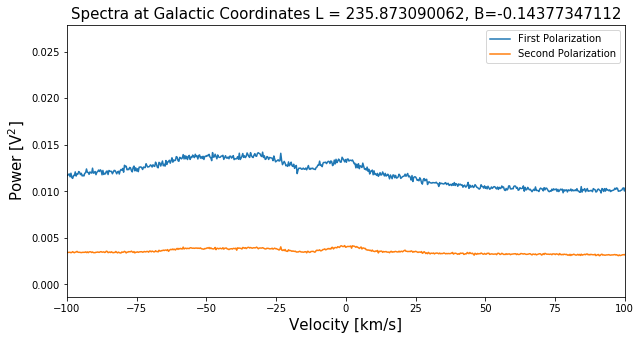

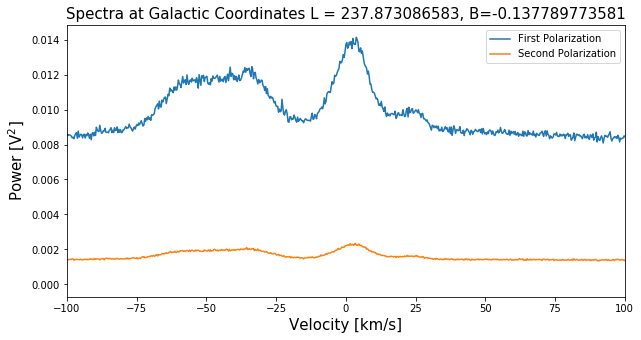

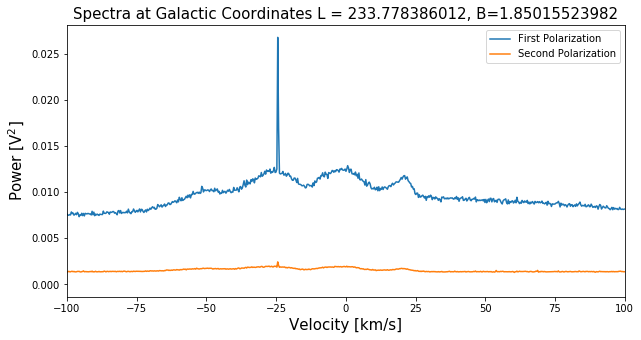

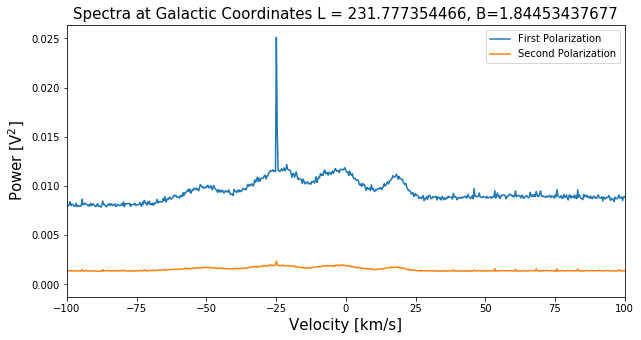

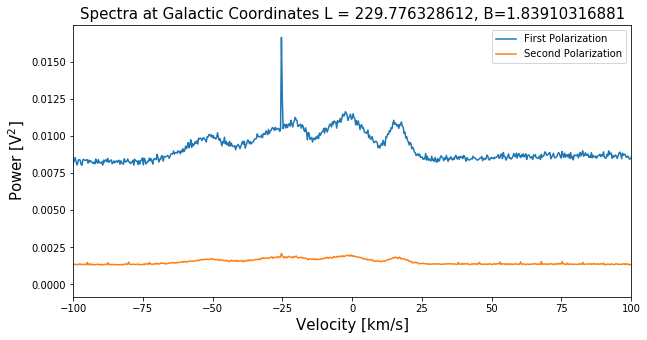

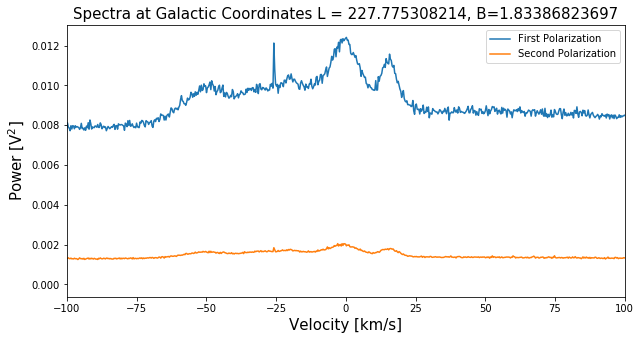

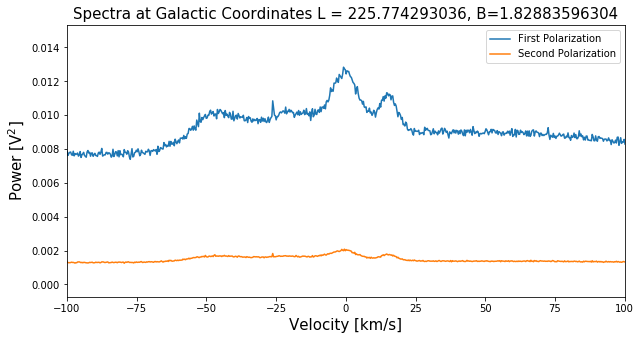

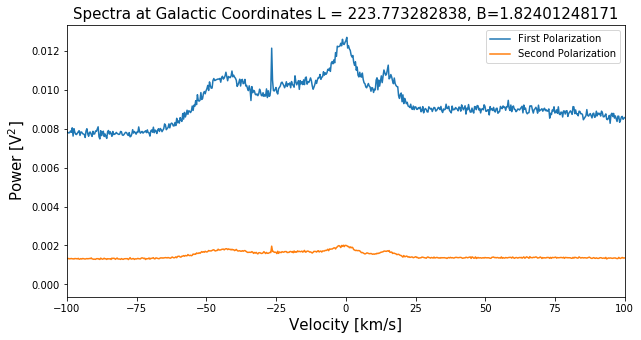

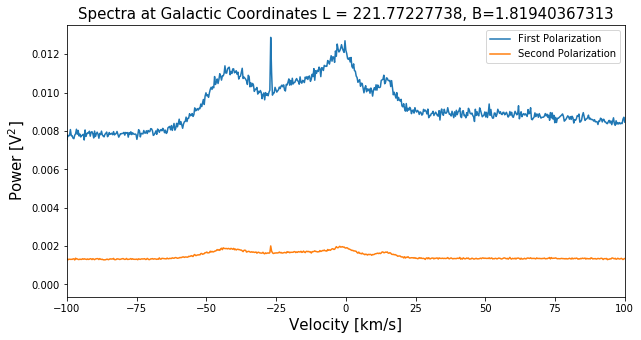

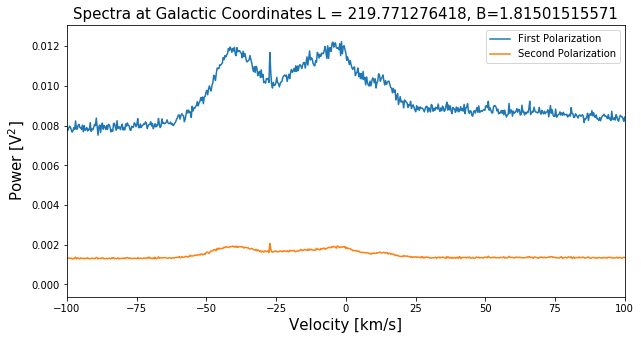

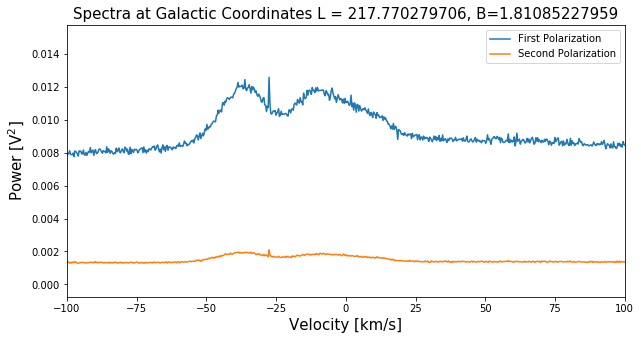

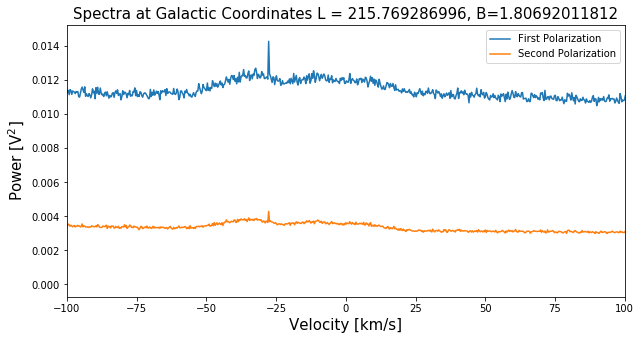

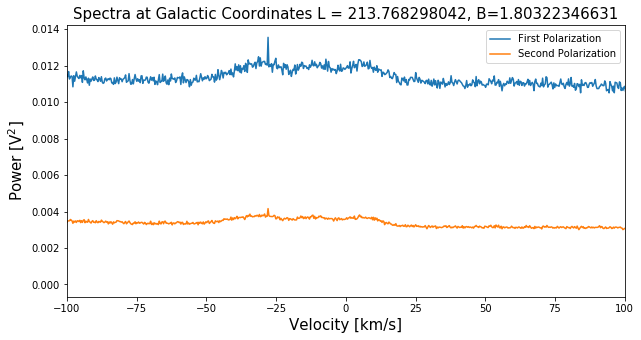

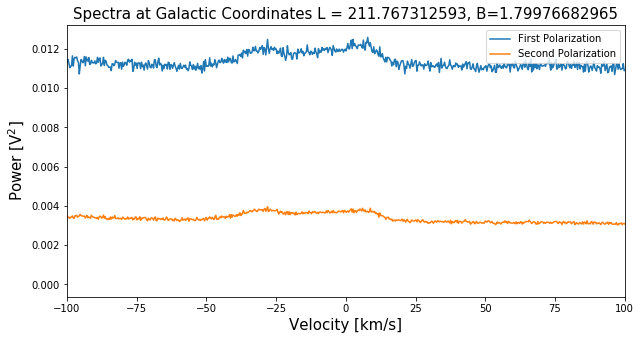

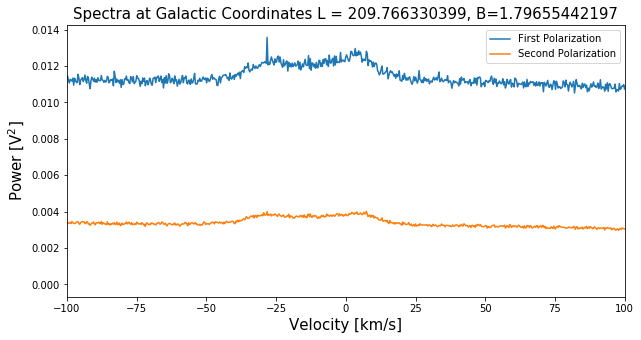

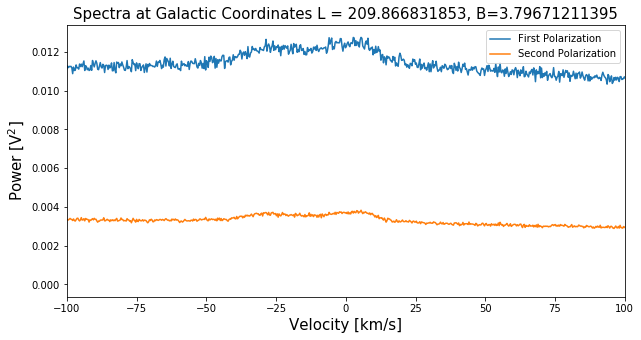

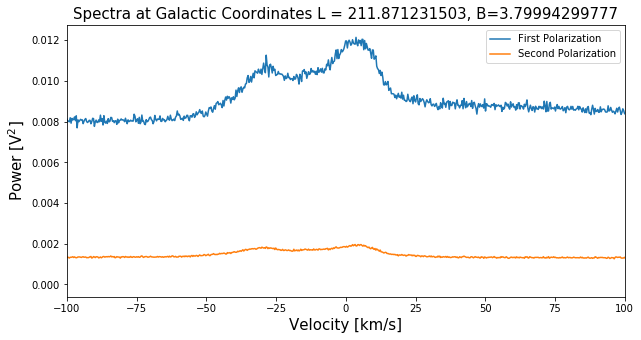

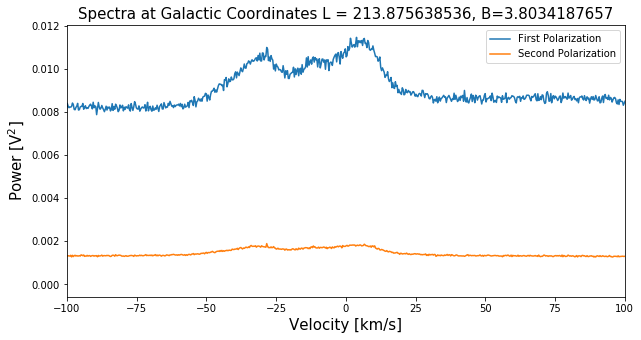

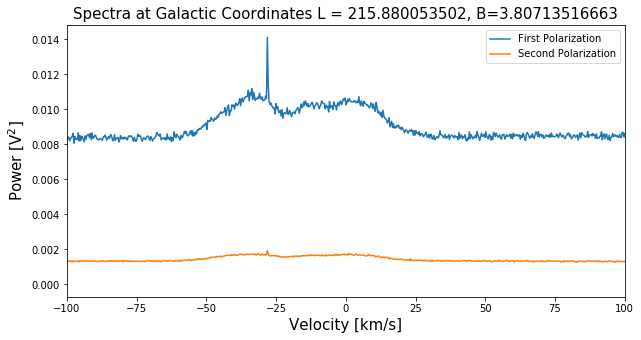

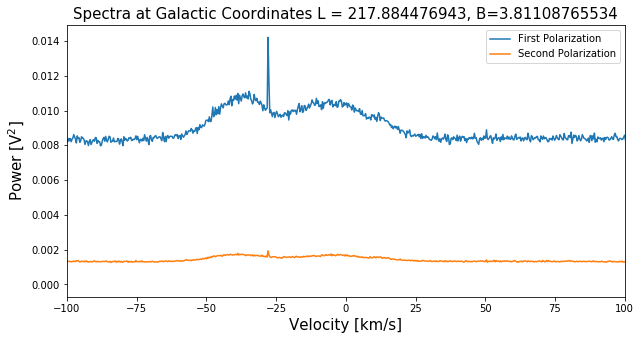

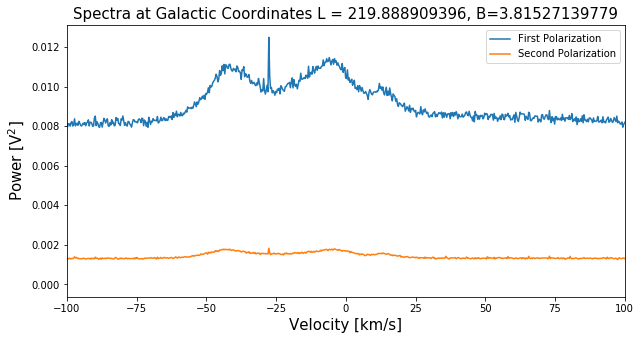

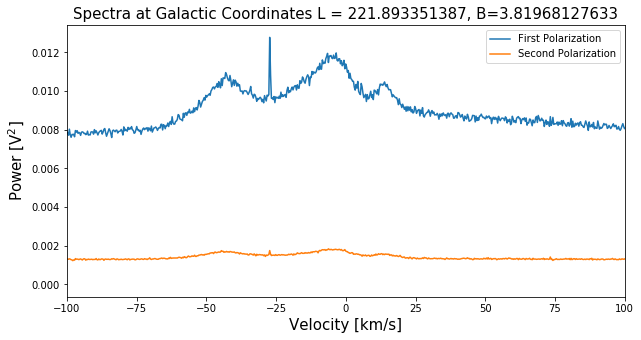

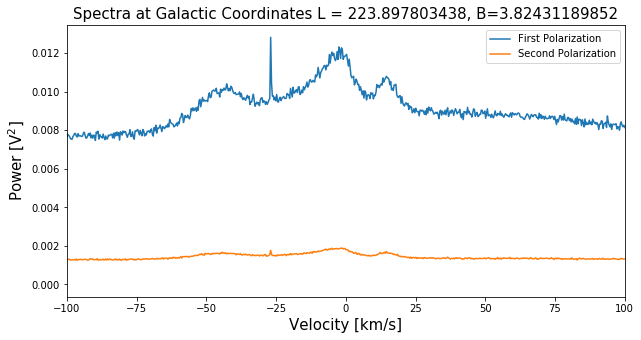

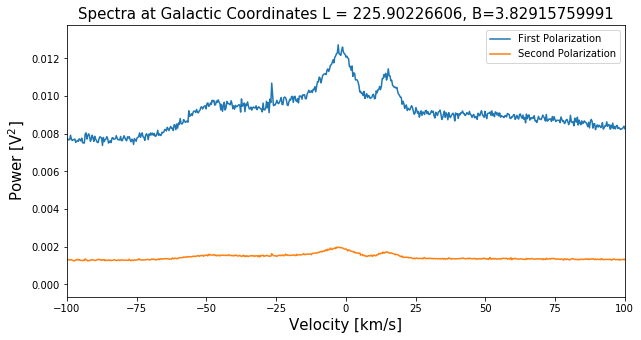

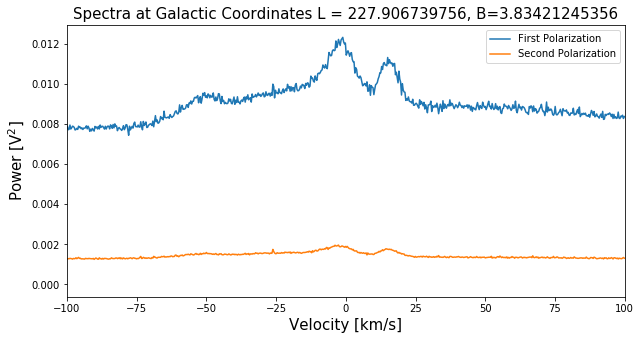

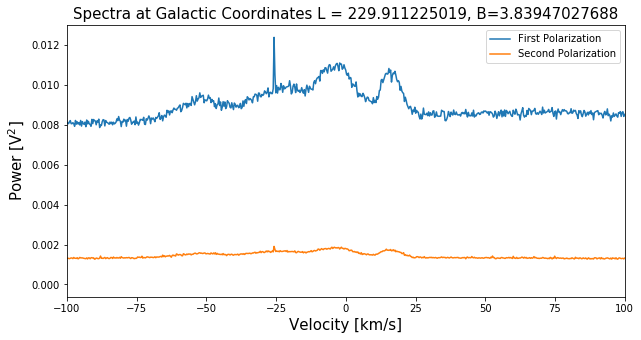

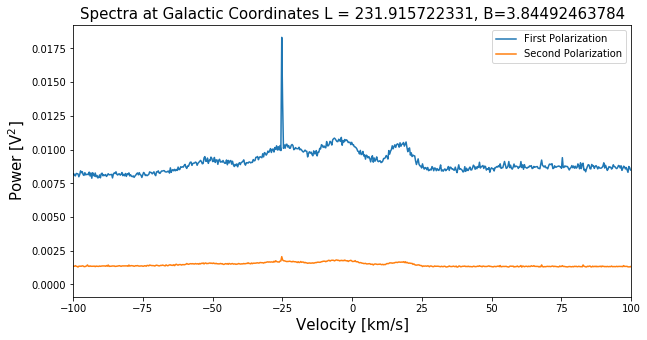

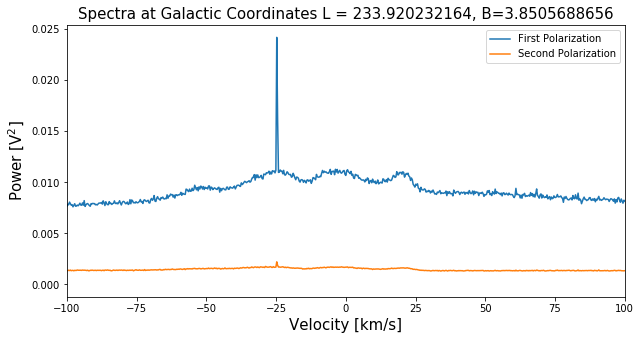

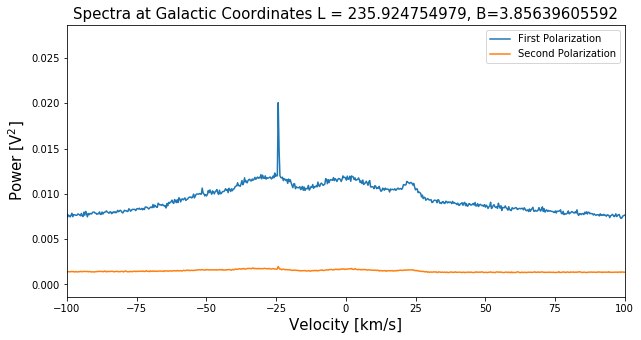

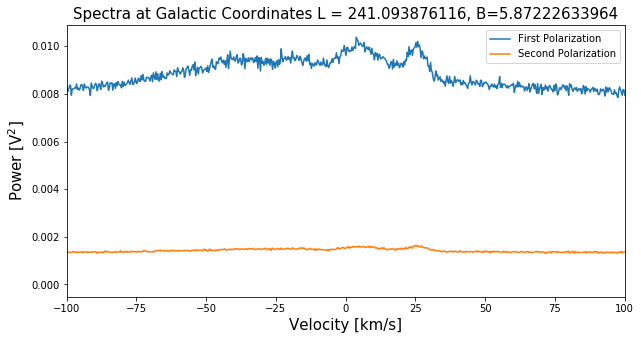

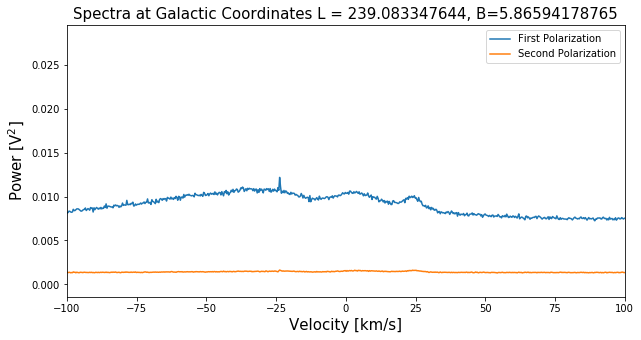

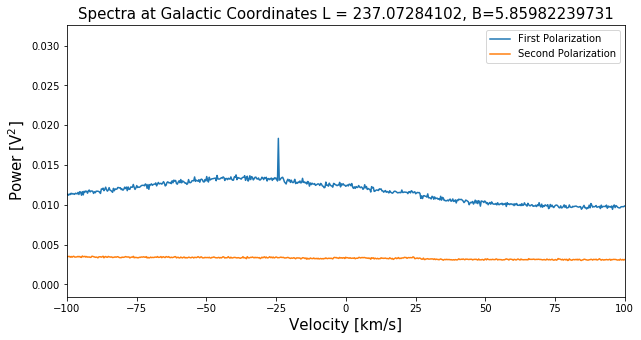

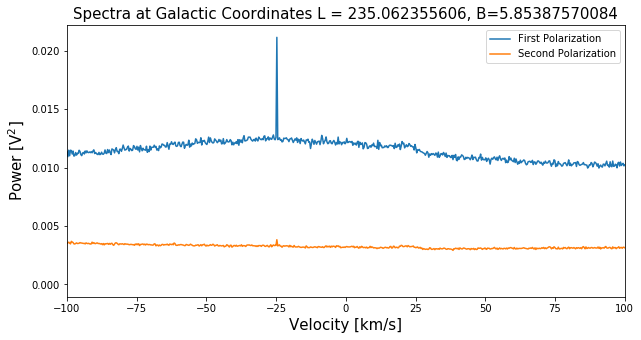

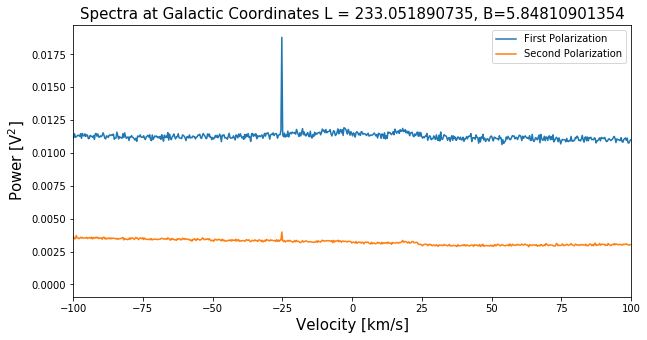

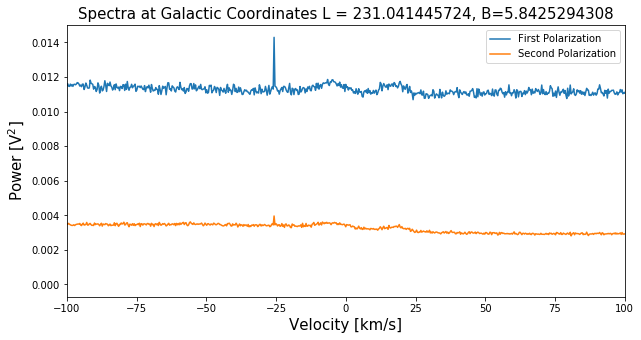

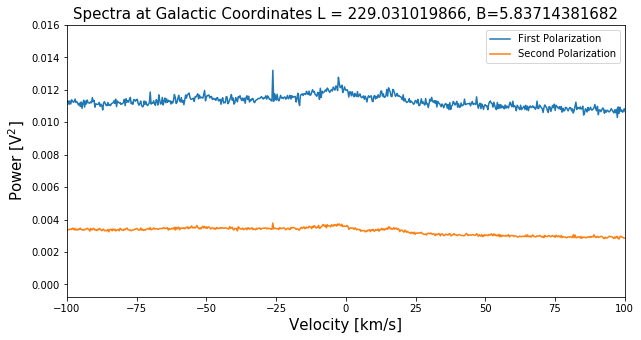

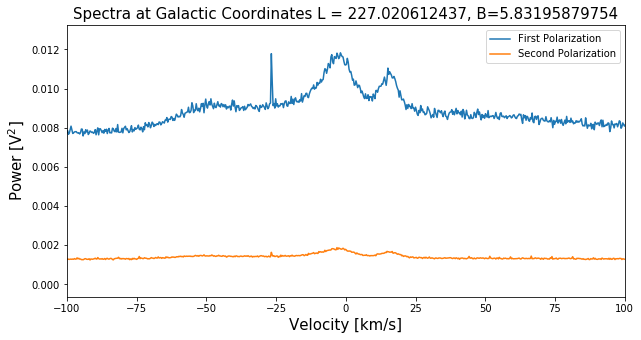

In [32]:
for k in range(int(len(files[:50]))):
    plt.figure(figsize = (10,5))
    plt.plot(Vel[k],POLAR1[k])
    plt.plot(Vel[k],POLAR2[k])
    plt.legend(['First Polarization','Second Polarization'],loc='upper right')
    plt.title('Spectra at Galactic Coordinates' ' L = {}, B={}'.format(L[k],B[k]),fontsize = 15)
    plt.xlabel('Velocity [km/s]', fontsize = 15)
    plt.ylabel('Power [V$^2$]',fontsize = 15)
    plt.xlim(-100,100)
    plt.show()


In [ ]:
plt.figure()
plt.plot(L,B,'o')
plt.xlim(0,380)
plt.show()